In [2]:
import torch
import torch.nn as nn
import numpy as np

import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('../..')))

from models._data import ChromatinDataset


In [3]:
dataset = ChromatinDataset(
    peak_regions="/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/pd_data/Microglia_peak_set_2.bed",
    nonpeak_regions="/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/own_data/test.chr1.negatives.adjusted.bed",
    genome_fasta="/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/data/downloads/hg38.fa",
    cts_bw_file="/gladstone/corces/lab/users/vishvak/chrombpnet_tutorial/pd_data/nd_Microglia_merge.bw",
    negative_sampling_ratio=0,
    input_len=2114,
    output_len=1000
)


Read in bed file of 151351 regions
Read in bed file of 16900 regions
Loaded 151351 peak regions and 0 non-peak regions


In [4]:
train_dataloader, valid_dataloader = dataset.split(train_chrs = ["chr2",
    "chr4",
    "chr5",
    "chr7",
    "chr9",
    "chr10",
    "chr11",
    "chr12",
    "chr13",
    "chr14",
    "chr15",
    "chr16",
    "chr17",
    "chr18",
    "chr19",
    "chr21",
    "chr22",
    "chrX",
    "chrY"],
    valid_chrs = ["chr1"] , 
    batch_size = 32 )

In [5]:
from utils.data_utils import calculate_average_total_counts

In [6]:
calculate_average_total_counts(train_dataloader)

KeyboardInterrupt: 

In [8]:
total_counts = []
for batch in train_dataloader:
    # Assuming the second element of targets is total counts
    _, targets = batch
    log_total_counts = targets[0]  # log-transformed total counts
    total_count_batch = torch.exp(log_total_counts)
    total_counts.extend(total_count_batch.numpy())

In [9]:
np.mean(total_counts)

228691.75

In [10]:
np.median(total_counts)

135458.5

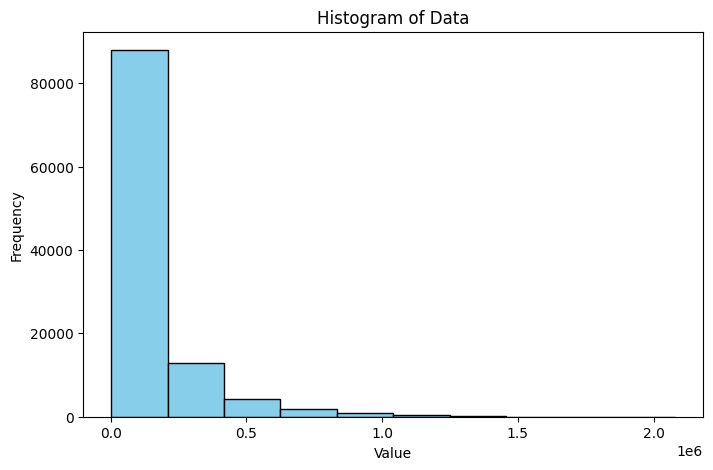

In [25]:
import matplotlib.pyplot as plt

flattened_data = np.concatenate(total_counts)

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(flattened_data, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [16]:
for batch in train_dataloader:
    inputs, targets
    i+=1

KeyboardInterrupt: 

In [19]:
for batch in train_dataloader:
    input, target = batch
    break

In [20]:
target[0]

tensor([[13.3316],
        [10.5085],
        [10.9788],
        [12.5330],
        [11.6639],
        [11.1754],
        [12.7516],
        [11.0685],
        [11.1693],
        [10.3446],
        [12.2699],
        [10.6774],
        [10.7757],
        [10.9749],
        [10.9016],
        [ 9.9413],
        [10.6129],
        [13.8303],
        [10.9633],
        [10.5295],
        [10.9928],
        [11.4284],
        [10.3049],
        [ 9.7044],
        [13.2093],
        [12.9798],
        [11.8836],
        [11.1231],
        [11.0050],
        [13.5057],
        [11.0726],
        [13.0549]])

In [27]:
target

[tensor([[ 9.1905],
         [11.1112],
         [ 9.6228],
         [10.3833],
         [ 7.4730],
         [11.2064],
         [ 7.6594],
         [ 7.2187],
         [ 7.7698],
         [ 8.6188],
         [10.5972],
         [ 9.2648],
         [ 7.0129],
         [ 7.5997],
         [10.0794],
         [ 6.8316],
         [ 7.0646],
         [ 7.5736],
         [10.1525],
         [ 7.4890],
         [ 9.1387],
         [11.3285],
         [ 9.7653],
         [ 7.1534],
         [ 6.7599],
         [ 7.6878],
         [ 7.7662],
         [ 7.0911],
         [ 7.0580],
         [10.8402],
         [10.3062],
         [ 7.2148]]),
 tensor([[  0.3637,   0.3637,   0.3637,  ...,   0.3771,   0.3771,   0.3771],
         [325.0630, 325.0630, 325.0630,  ..., 158.9800, 161.1650, 163.3580],
         [  3.0951,   3.0951,   3.9769,  ...,   3.1874,   3.1874,   3.1874],
         ...,
         [ 10.4464,  10.4464,  10.4464,  ...,  16.9743,  18.2973,  16.9743],
         [  1.3105,   1.3105,   1.31

In [24]:
profile_target, log_total_count_target = target

In [26]:
profile_target

tensor([[ 9.1905],
        [11.1112],
        [ 9.6228],
        [10.3833],
        [ 7.4730],
        [11.2064],
        [ 7.6594],
        [ 7.2187],
        [ 7.7698],
        [ 8.6188],
        [10.5972],
        [ 9.2648],
        [ 7.0129],
        [ 7.5997],
        [10.0794],
        [ 6.8316],
        [ 7.0646],
        [ 7.5736],
        [10.1525],
        [ 7.4890],
        [ 9.1387],
        [11.3285],
        [ 9.7653],
        [ 7.1534],
        [ 6.7599],
        [ 7.6878],
        [ 7.7662],
        [ 7.0911],
        [ 7.0580],
        [10.8402],
        [10.3062],
        [ 7.2148]])

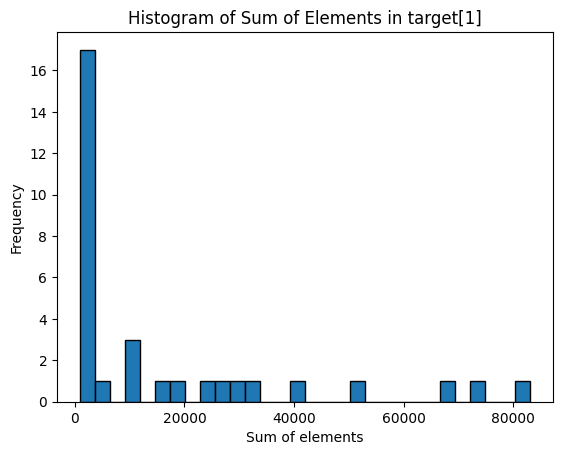

In [12]:
import matplotlib.pyplot as plt
sum_tensor= target[1].sum(-1, keepdims=True)
sum_array = sum_tensor.numpy()
plt.hist(sum_array, bins=30, edgecolor='black')
plt.xlabel('Sum of elements')
plt.ylabel('Frequency')
plt.title('Histogram of Sum of Elements in target[1]')
plt.show()

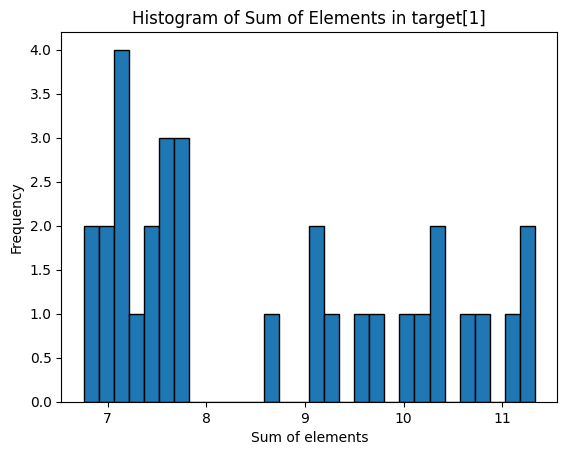

In [16]:
sum_tensor= np.log(1+target[1].sum(-1, keepdims=True))
sum_array = sum_tensor.numpy()
plt.hist(sum_array, bins=30, edgecolor='black')
plt.xlabel('Sum of elements')
plt.ylabel('Frequency')
plt.title('Histogram of Sum of Elements in target[1]')
plt.show()

In [19]:
target[0]

tensor([[ 9.1905],
        [11.1112],
        [ 9.6228],
        [10.3833],
        [ 7.4730],
        [11.2064],
        [ 7.6594],
        [ 7.2187],
        [ 7.7698],
        [ 8.6188],
        [10.5972],
        [ 9.2648],
        [ 7.0129],
        [ 7.5997],
        [10.0794],
        [ 6.8316],
        [ 7.0646],
        [ 7.5736],
        [10.1525],
        [ 7.4890],
        [ 9.1387],
        [11.3285],
        [ 9.7653],
        [ 7.1534],
        [ 6.7599],
        [ 7.6878],
        [ 7.7662],
        [ 7.0911],
        [ 7.0580],
        [10.8402],
        [10.3062],
        [ 7.2148]])

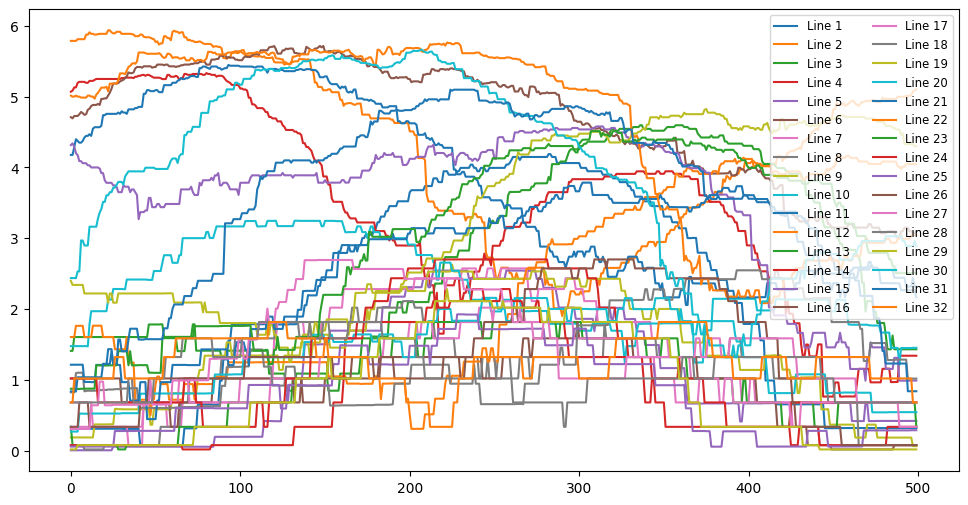

In [21]:
plt.figure(figsize=(12, 6)) 
for i in range(target[1].shape[0]):
    plt.plot(np.log1p(target[1][i].numpy()), label=f'Line {i+1}')  # Convert tensor row to numpy for plotting
plt.legend(loc="upper right", fontsize="small", ncol=2)  # Show legend for all lines
plt.show()

In [5]:
import matplotlib.pyplot as plt

In [10]:
dataset.seqs.shape

torch.Size([10823, 1000, 4])

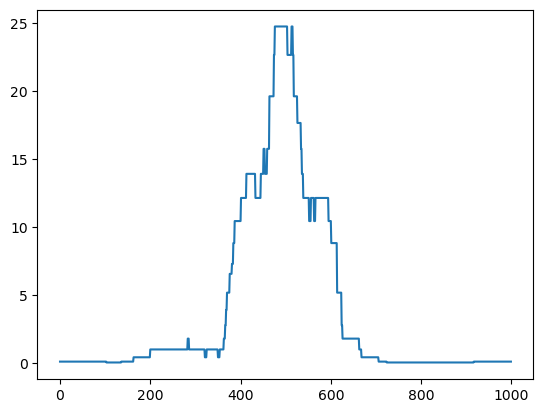

In [6]:
plt.plot(dataset.cts[1])

# Yay we have a peak!

AttributeError: 'tuple' object has no attribute 'shape'